In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
dataset = 'https://www.kaggle.com/datasets/mshadab/stackoverflowuser'
od.download(dataset,force=True)

In [6]:
import os

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv( 'data.csv')
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,88377,NaN,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,"Not employed, and not looking for work",Canada,No,Primary/elementary school,NaN,...,NaN,Tech articles written by other developers;Tech...,NaN,Man,No,NaN,NaN,No,Appropriate in length,Easy
88879,88601,NaN,No,Never,The quality of OSS and closed source software ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,88802,NaN,No,Never,NaN,Employed full-time,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88881,88816,NaN,No,Never,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


string_to_int= preprocessing.LabelEncoder()    #converts the categorical variables to integers 
df = df.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
df=df.apply(string_to_int.fit_transform) 

df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,0,1,1,2,2,3,169,0,5,12,...,2,8,6,0,0,6,196,0,0,2
1,11111,1,0,1,2,4,21,1,7,12,...,2,10,17,0,0,6,196,0,0,2
2,22222,2,1,2,2,0,157,0,1,11,...,2,14,38,0,0,6,196,1,0,2
3,33333,0,0,2,2,0,171,0,1,6,...,2,10,25,0,0,6,192,0,0,1
4,44444,0,1,3,0,0,167,0,1,6,...,2,14,43,0,0,6,195,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,87086,5,1,0,2,3,30,0,5,12,...,6,12,126,0,0,7,196,0,0,1
88879,87336,5,0,2,2,6,179,3,9,12,...,6,15,126,7,2,7,196,2,3,3
88880,87559,5,0,2,3,0,179,3,9,12,...,6,15,126,7,2,7,196,2,3,3
88881,87574,5,0,2,0,2,179,3,9,12,...,6,15,126,7,2,7,196,2,3,3


In [24]:
data_feature_cols = ['Respondent','OpenSourcer','OpenSource','Employment']
X = df[data_feature_cols ]                               
y = df.Hobbyist

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [19]:
from sklearn.tree import DecisionTreeClassifier                             
model =DecisionTreeClassifier(criterion="entropy", random_state=100) 

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [20]:
y_pred= model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))
data_compared=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_compared

Accuracy: 0.7011063191449466


,Actual,Predicted
2731,1,1
77495,1,0
74122,1,1
72013,1,1
66776,1,0
...,...,...
20403,1,1
56520,1,1
5938,1,1
55889,0,0


In [21]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred)) 

[[ 1282  4016]
 [ 3954 17413]]


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.24      0.24      5298
           1       0.81      0.81      0.81     21367

    accuracy                           0.70     26665
   macro avg       0.53      0.53      0.53     26665
weighted avg       0.70      0.70      0.70     26665



[Text(605.0630504648514, 1084.1460674157304, 'OpenSourcer <= 0.5\nentropy = 0.718\nsamples = 62218\nvalue = [12328, 49890]\nclass = No'),
 Text(152.61887872620713, 1078.038202247191, 'OpenSource <= 2.5\nentropy = 0.517\nsamples = 14357\nvalue = [1662, 12695]\nclass = No'),
 Text(74.29109451590995, 1071.9303370786517, 'Respondent <= 230.5\nentropy = 0.515\nsamples = 14183\nvalue = [1631, 12552]\nclass = No'),
 Text(64.97159663564179, 1065.8224719101124, 'Respondent <= 208.5\nentropy = 0.787\nsamples = 34\nvalue = [8, 26]\nclass = No'),
 Text(64.76843264801346, 1059.714606741573, 'Respondent <= 42.5\nentropy = 0.696\nsamples = 32\nvalue = [6, 26]\nclass = No'),
 Text(64.56526866038513, 1053.6067415730338, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = No'),
 Text(64.97159663564179, 1053.6067415730338, 'Respondent <= 46.0\nentropy = 0.764\nsamples = 27\nvalue = [6, 21]\nclass = No'),
 Text(64.76843264801346, 1047.4988764044945, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Ye

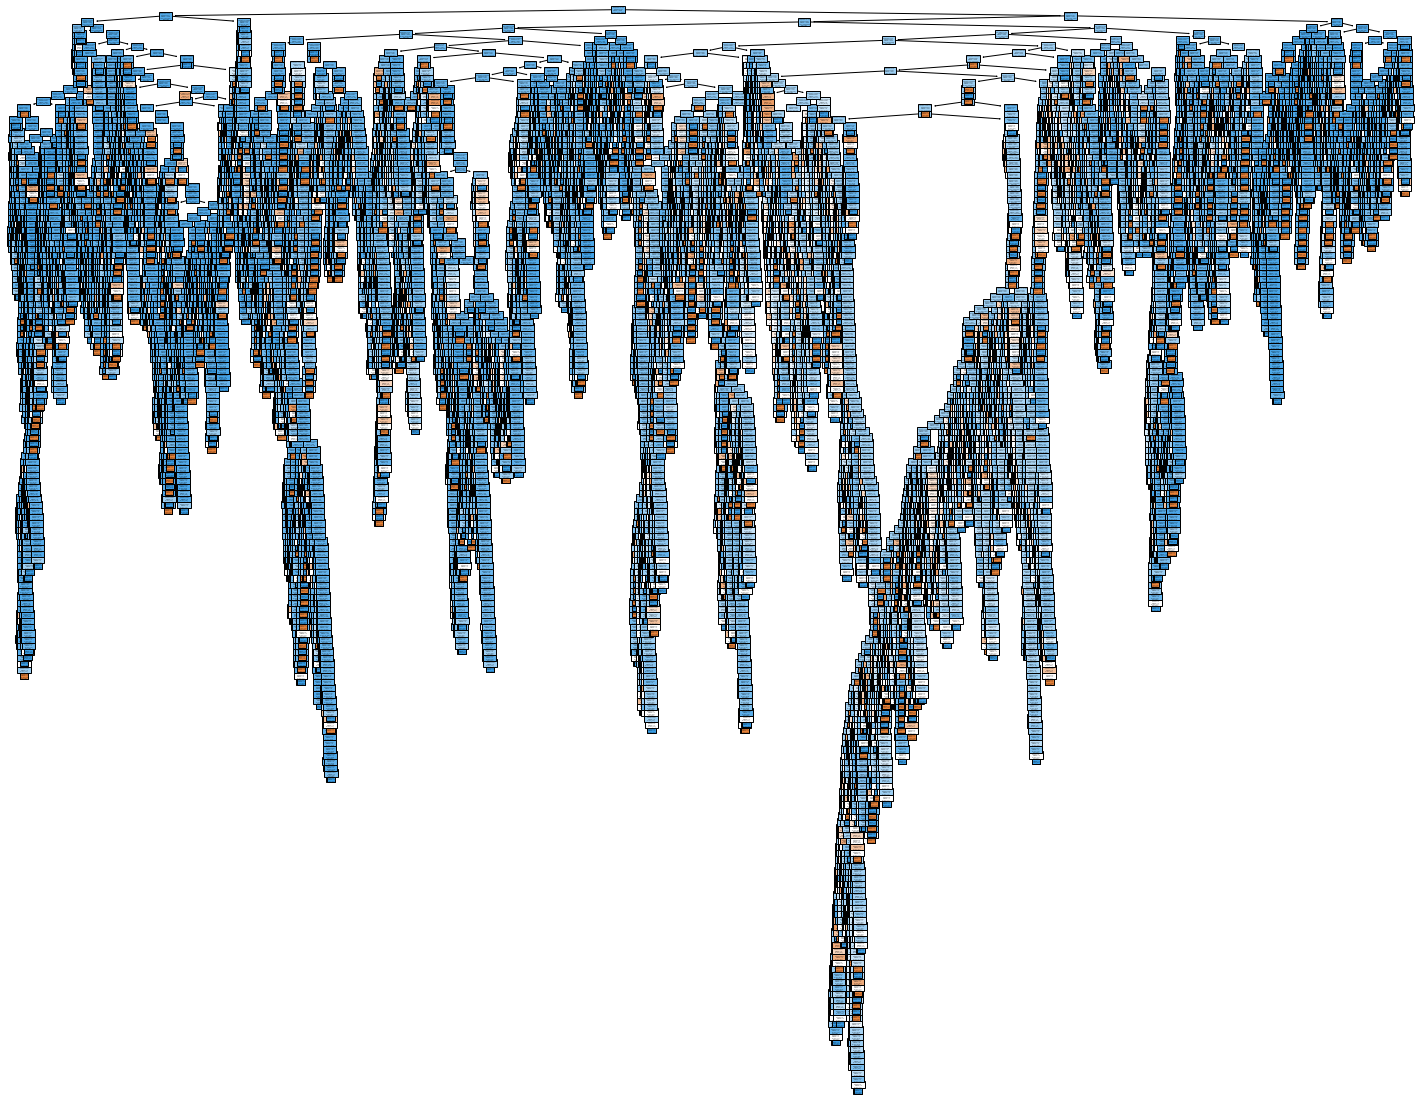

In [23]:
from sklearn import tree
from matplotlib import pyplot as plt
figure= plt.figure(figsize=(25,20))
tree.plot_tree(model,feature_names=data_feature_cols,class_names=['Yes','No'],filled=True)